In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('election2024.csv')

In [3]:
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [5]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

In [8]:
df.dtypes

id                      object
sex                     object
age                    float64
federal_district        object
type_of_city            object
knows_election_date     object
will_vote               object
candidate               object
television_usage        object
internet_usage          object
education               object
income                  object
employment              object
job_type                object
company_type            object
weight1                float64
dtype: object

In [9]:
df.describe()

,age,weight1
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


<Axes: xlabel='age', ylabel='Count'>

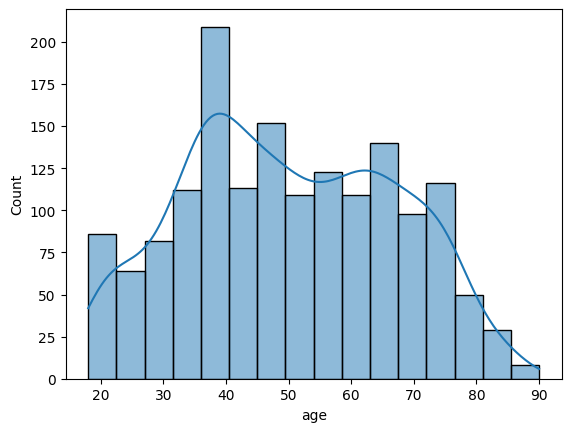

In [11]:
sns.histplot(df.age,kde=True)

In [14]:
import statistics
statistics.mode(df.age)

37.0

In [1]:
#youngest person in dataset is 18 years old and oldest is 90 years old

#roughly equal distribution of age in dataset in age group of around 32 to 77 years old except 
#people between 35 and 40 years old

#mean age is 49.9 years old and standard deviation of age is 16.9 years

<Axes: xlabel='count', ylabel='sex'>

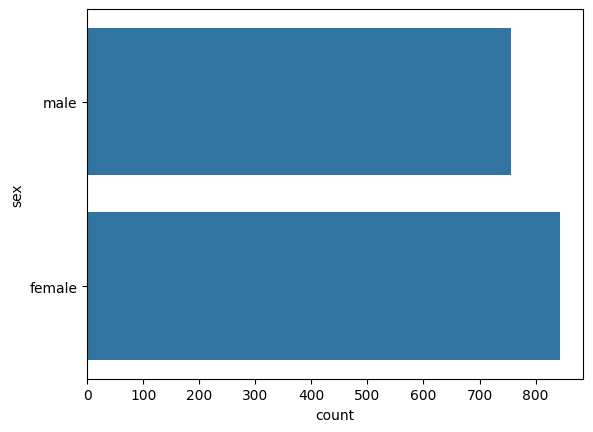

In [16]:
sns.countplot(df.sex)

In [17]:
df.shape

(1600, 16)

In [18]:
df.sex.value_counts()

sex
female    843
male      757
Name: count, dtype: int64

In [21]:
843-757

86

In [2]:
#only 86 more females than males in dataset, so the distribution of gender is almost equal

In [23]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

In [24]:
df.sample(3)

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
1527,0716a58556cce334,female,64.0,northwestern,settlement,named correct date,definitely yes,Putin,over 4 hours a day,over 4 hours a day,college,low,unemployed pensioner,NaN,NaN,0.655107
202,07168804c6ccebd2,male,26.0,north caucasian,village,not sure or no answer,definitely yes,Putin,does not watch,over 4 hours a day,college,high,work for hire,commercial organization,hard to say,1.215363
804,0716d38cd28ce166,male,52.0,central,city with population of less than 50k,named correct date,definitely yes,Slutskiy,once half a year,several times a month,college,medium,self-employed,NaN,housing and communal services,0.713025


<Axes: xlabel='count', ylabel='candidate'>

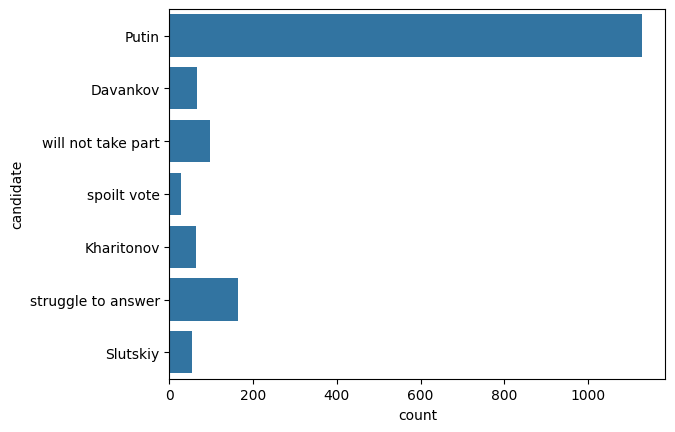

In [25]:
sns.countplot(df.candidate)

In [26]:
#almost everyone wants to vote for only Putin

In [27]:
df.will_vote.unique()

array(['not sure', 'definitely yes', 'likely no', 'definitely no',
       'likely yes', 'struggle to answer'], dtype=object)

<Axes: xlabel='count', ylabel='will_vote'>

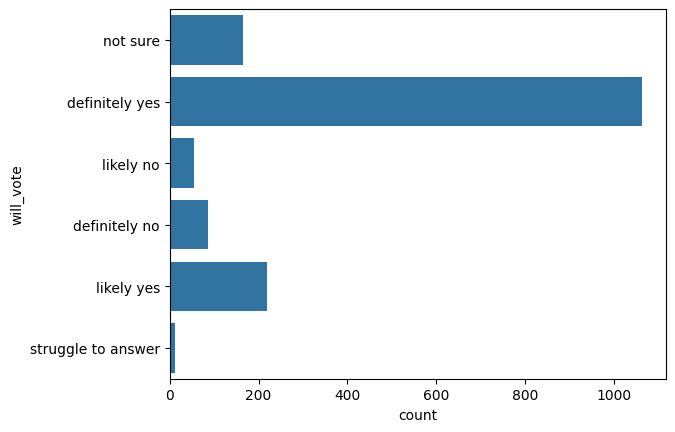

In [28]:
sns.countplot(df.will_vote)

In [29]:
#most people will definitely vote

In [30]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

In [34]:
contingency_table=pd.crosstab(df['internet_usage'], df['will_vote'])
print(contingency_table)

will_vote                definitely no  definitely yes  likely no  likely yes  \
internet_usage                                                                  
does not use internet               13             193          6          26   
less than 4 hours a day             30             414         16          96   
once half a year                     0              14          0           2   
over 4 hours a day                  38             351         31          80   
several times a month                3              18          0           2   
several times a week                 2              72          2          12   

will_vote                not sure  struggle to answer  
internet_usage                                         
does not use internet          18                   3  
less than 4 hours a day        52                   5  
once half a year                2                   0  
over 4 hours a day             74                   2  
several times a

In [36]:
from scipy.stats import chi2_contingency
chi2,p,dof,ex=chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 47.001914893307294
P-value: 0.004900601579747453


In [37]:
p<0.05

True

In [41]:
#Reject H0 
#There is a significant relationship between internet usage and peoples decision on voting

In [47]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

In [51]:
contingency_table=pd.crosstab(df['type_of_city'], df['candidate'])
print(contingency_table)

candidate                                     Davankov  Kharitonov  Putin  \
type_of_city                                                                
city with population of 1 million and higher        26          11    184   
city with population of 100-500k                    19          16    268   
city with population of 50-100k                      3           5     74   
city with population of 500-950k                     7          12    111   
city with population of less than 50k                2           5    141   
settlement                                           0           3     63   
village                                             10          11    287   

candidate                                     Slutskiy  spoilt vote  \
type_of_city                                                          
city with population of 1 million and higher        13            7   
city with population of 100-500k                    17            8   
city with population o

In [52]:
from scipy.stats import chi2_contingency
chi2,p,dof,ex=chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 75.63177102505182
P-value: 0.0001232899346147423


In [53]:
p<0.05

True

In [55]:
#Reject H0
#There is relationship between type of city and candidate

In [59]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

In [62]:
df.groupby('sex')['age'].mean()

sex
female    52.83274
male      46.71070
Name: age, dtype: float64

In [4]:
#Average age of males and females in dataset are almost same at around 50 years old

/tmp/ipykernel_4118/1149900405.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, palette='viridis')
/tmp/ipykernel_4118/1149900405.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/tmp/ipykernel_4118/1149900405.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, palette='viridis')
/tmp/ipykernel_4118/1149900405.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


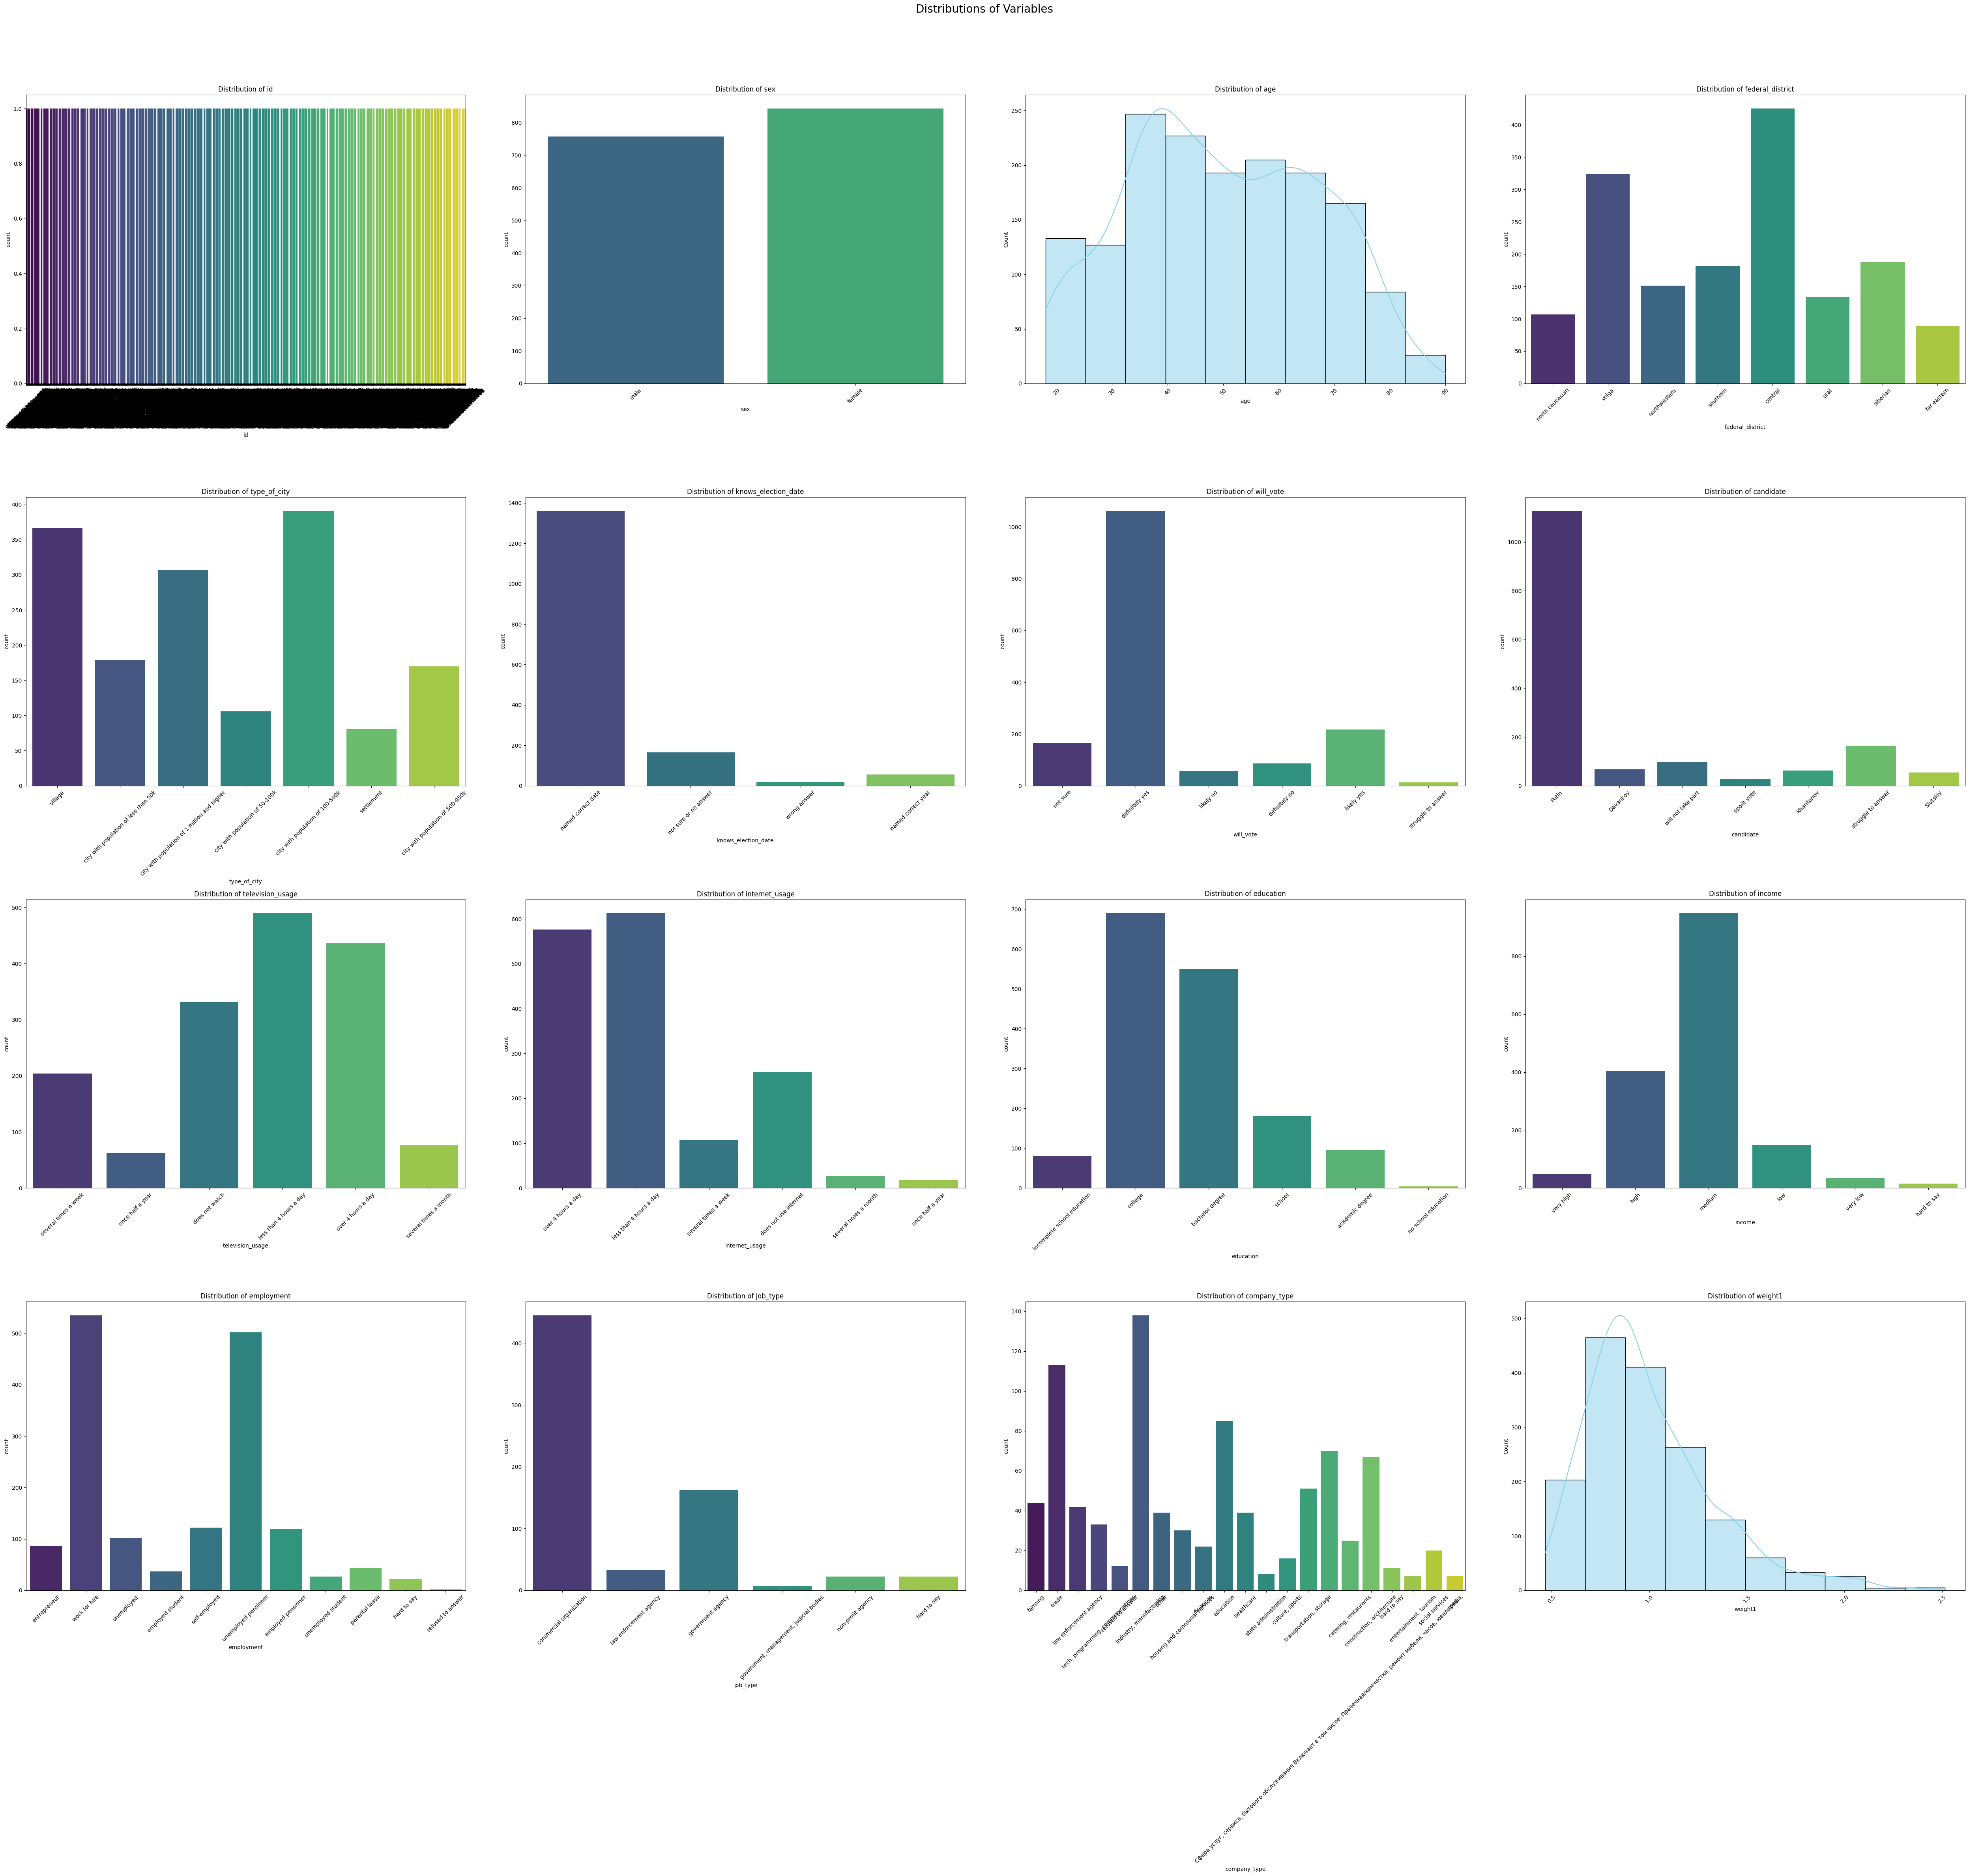

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(50, 50))
fig.suptitle('Distributions of Variables', fontsize=20)
columns = df.columns
for i, col in enumerate(columns):
    ax = axes[i // 4, i % 4]
    if df[col].dtype == 'object':
        sns.countplot(data=df, x=col, ax=ax, palette='viridis')
        ax.set_title(f'Distribution of {col}')
    else:
        sns.histplot(df[col], bins=10, kde=True, ax=ax, color='skyblue')
        ax.set_title(f'Distribution of {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [24]:
#most people know the election date
#most people have medium income
#most peoples highest education is college and closely followed by bachelors degree
#most peoples job type is 'commercial organisation'
#most people work for hire or are unemployed pensioners
#top 2 federal districts are 'central' and 'volga'